<a href="https://colab.research.google.com/github/Myusuf2/MIS-64061_myusuf2/blob/main/Mukhtar_64061.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

### import libraries

import matplotlib 
import matplotlib.pyplot as plt
import numpy as np
from keras import models
from keras import layers

**Loaded from the IMDB dataset**

In [ ]:
### importing the dataset
### the data is splitted into 25,000 reviews for training and 25,000 reviews for testing

from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)


In [ ]:
### the levels are lists of 0s and 1s, where 0 stands for negative and 1 stands for positive
train_labels[0]

1

In [ ]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [ ]:
### here, no most frequent words will exceed 10,000
max([max(sequence) for sequence in train_data])

9999

### Decoding reviews back to text

In [ ]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]])

1654784/1641221 [==============================] - 0s 0us/step


### Preparing the data

### Encoding the integer sequences via multi-hot encoding

In [ ]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [ ]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

In [ ]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

### Building my Model

In [ ]:
###   Model Structure/definition 
### we create two intermidiate layers with 16 units each, 
### and a layer that would output the scaler prediction
### we maintain "relu" activation function

from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
   layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

### Compiling the model
#### I configure the model with rmsprop optimizer and binary_crossentropy loss funtion

In [ ]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [ ]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

### Validating the approach:
#### Setting aside a validation set

In [ ]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

### Training the model:
#### We now train the model for 20 epochs (iterations over all samples)

In [ ]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 47ms/step - loss: 0.5291 - accuracy: 0.7863 - val_loss: 0.4013 - val_accuracy: 0.8502
Epoch 2/20
30/30 [==============================] - 1s 35ms/step - loss: 0.3079 - accuracy: 0.8989 - val_loss: 0.3017 - val_accuracy: 0.8869
Epoch 3/20
30/30 [==============================] - 1s 34ms/step - loss: 0.2188 - accuracy: 0.9270 - val_loss: 0.2771 - val_accuracy: 0.8886
Epoch 4/20
30/30 [==============================] - 1s 35ms/step - loss: 0.1689 - accuracy: 0.9445 - val_loss: 0.2824 - val_accuracy: 0.8868
Epoch 5/20
30/30 [==============================] - 1s 35ms/step - loss: 0.1316 - accuracy: 0.9570 - val_loss: 0.3101 - val_accuracy: 0.8798
Epoch 6/20
30/30 [==============================] - 1s 35ms/step - loss: 0.1053 - accuracy: 0.9673 - val_loss: 0.3440 - val_accuracy: 0.8769
Epoch 7/20
30/30 [==============================] - 1s 35ms/step - loss: 0.0855 - accuracy: 0.9747 - val_loss: 0.3358 - val_accuracy: 0.8848
Epoch 8/20
30

### Plotting the training and validation loss

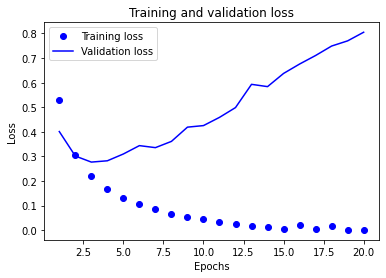

In [ ]:


history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

### Plotting the training and validation accuracy

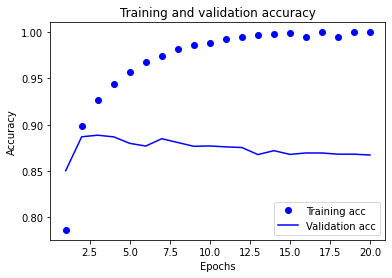

In [ ]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
###  I now changed the changed the optimizer to "adam" and compare the models
modelx1 = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

modelx1_1 = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

In [ ]:
modelx1.compile(optimizer="adam",
              loss="binary_crossentropy",
              metrics=["accuracy"])

modelx1_1.compile(optimizer="adam",
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [ ]:
historyx1 = modelx1.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

historyx1_1 = modelx1.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 47ms/step - loss: 0.5940 - accuracy: 0.7525 - val_loss: 0.4271 - val_accuracy: 0.8524
Epoch 2/20
30/30 [==============================] - 1s 38ms/step - loss: 0.3067 - accuracy: 0.8961 - val_loss: 0.2865 - val_accuracy: 0.8902
Epoch 3/20
30/30 [==============================] - 1s 33ms/step - loss: 0.1881 - accuracy: 0.9381 - val_loss: 0.2753 - val_accuracy: 0.8928
Epoch 4/20
30/30 [==============================] - 1s 34ms/step - loss: 0.1333 - accuracy: 0.9594 - val_loss: 0.2921 - val_accuracy: 0.8877
Epoch 5/20
30/30 [==============================] - 1s 34ms/step - loss: 0.0940 - accuracy: 0.9741 - val_loss: 0.3260 - val_accuracy: 0.8840
Epoch 6/20
30/30 [==============================] - 1s 35ms/step - loss: 0.0644 - accuracy: 0.9845 - val_loss: 0.3713 - val_accuracy: 0.8803
Epoch 7/20
30/30 [==============================] - 1s 34ms/step - loss: 0.0445 - accuracy: 0.9897 - val_loss: 0.4324 - val_accuracy: 0.8747
Epoch 8/20
30

Ploting

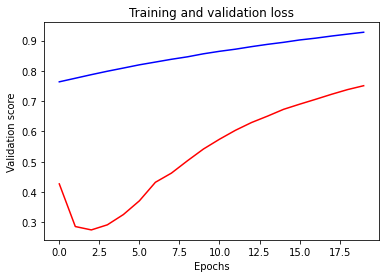

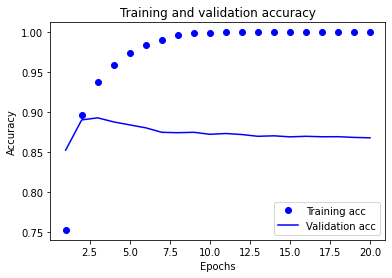

In [ ]:
historyxp1 = historyx1.history
historyxp1_1 = historyx1_1.history

plt.plot(historyx1.history['val_loss'], 'r', historyx1_1.history['val_loss'], 'b')
plt.title("Training and validation loss")
plt.xlabel('Epochs')
plt.ylabel('Validation score')
plt.show()



plt.clf()
acc = historyxp1["accuracy"]
val_acc = historyxp1["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Try using layers with more hidden units or fewer hidden units: 32 units, 64 units, and so on.


In [ ]:
model2 = keras.Sequential([
    layers.Dense(32, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

In [ ]:
model2.compile(optimizer="adam",
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [ ]:
history2 = model2.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 65ms/step - loss: 0.5107 - accuracy: 0.7965 - val_loss: 0.3381 - val_accuracy: 0.8706
Epoch 2/20
30/30 [==============================] - 1s 41ms/step - loss: 0.2406 - accuracy: 0.9114 - val_loss: 0.2845 - val_accuracy: 0.8859
Epoch 3/20
30/30 [==============================] - 1s 43ms/step - loss: 0.1549 - accuracy: 0.9460 - val_loss: 0.2880 - val_accuracy: 0.8874
Epoch 4/20
30/30 [==============================] - 2s 68ms/step - loss: 0.1046 - accuracy: 0.9691 - val_loss: 0.3171 - val_accuracy: 0.8819
Epoch 5/20
30/30 [==============================] - 1s 50ms/step - loss: 0.0707 - accuracy: 0.9824 - val_loss: 0.3620 - val_accuracy: 0.8769
Epoch 6/20
30/30 [==============================] - 1s 41ms/step - loss: 0.0460 - accuracy: 0.9911 - val_loss: 0.4120 - val_accuracy: 0.8745
Epoch 7/20
30/30 [==============================] - 1s 42ms/step - loss: 0.0286 - accuracy: 0.9961 - val_loss: 0.4656 - val_accuracy: 0.8743
Epoch 8/20
30

Ploting

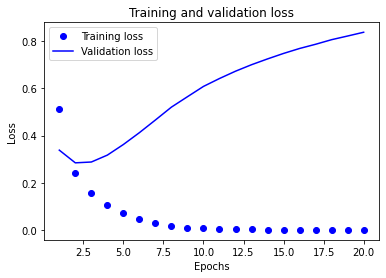

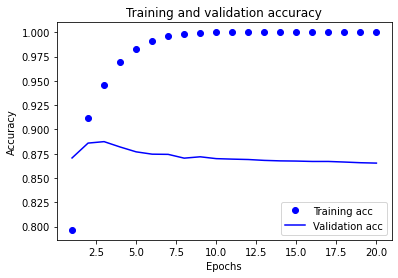

In [ ]:
historyp2 = history2.history
loss_values = historyp2["loss"]
val_loss_values = historyp2["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

plt.clf()
acc = historyp2["accuracy"]
val_acc = historyp2["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Try using the mse loss function instead of binary_crossentropy.

In [ ]:
modelx3 = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

In [ ]:
modelx3.compile(optimizer="adam",
              loss="mse",
              metrics=["accuracy"])

In [ ]:
historyx3 = modelx3.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 3s 69ms/step - loss: 0.2007 - accuracy: 0.7224 - val_loss: 0.1470 - val_accuracy: 0.8581
Epoch 2/20
30/30 [==============================] - 1s 34ms/step - loss: 0.1074 - accuracy: 0.9003 - val_loss: 0.1000 - val_accuracy: 0.8856
Epoch 3/20
30/30 [==============================] - 1s 34ms/step - loss: 0.0693 - accuracy: 0.9312 - val_loss: 0.0878 - val_accuracy: 0.8891
Epoch 4/20
30/30 [==============================] - 1s 34ms/step - loss: 0.0508 - accuracy: 0.9506 - val_loss: 0.0840 - val_accuracy: 0.8888
Epoch 5/20
30/30 [==============================] - 1s 34ms/step - loss: 0.0389 - accuracy: 0.9643 - val_loss: 0.0840 - val_accuracy: 0.8857
Epoch 6/20
30/30 [==============================] - 1s 34ms/step - loss: 0.0304 - accuracy: 0.9744 - val_loss: 0.0851 - val_accuracy: 0.8850
Epoch 7/20
30/30 [==============================] - 1s 34ms/step - loss: 0.0240 - accuracy: 0.9825 - val_loss: 0.0864 - val_accuracy: 0.8819
Epoch 8/20
30

Ploting

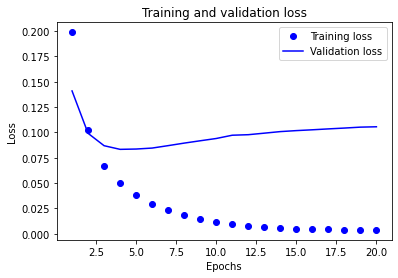

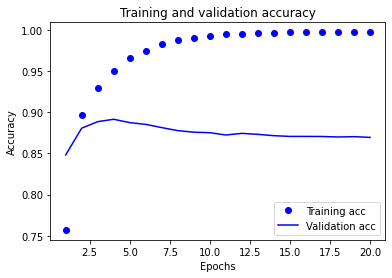

In [ ]:
historyp3 = history3.history
loss_values = historyp3["loss"]
val_loss_values = historyp3["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()



plt.clf()
acc = historyp3["accuracy"]
val_acc = historyp3["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Try using the tanh activation (an activation that was popular in the early days of neural networks) instead of relu.


In [ ]:
model4 = keras.Sequential([
    layers.Dense(16, activation="tanh"),
    layers.Dense(16, activation="tanh"),
    layers.Dense(1, activation="sigmoid")
])

In [ ]:
model4.compile(optimizer="adam",
              loss="mse",
              metrics=["accuracy"])

In [ ]:
history4 = model4.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 60ms/step - loss: 0.1560 - accuracy: 0.8000 - val_loss: 0.1075 - val_accuracy: 0.8621
Epoch 2/20
30/30 [==============================] - 1s 36ms/step - loss: 0.0731 - accuracy: 0.9127 - val_loss: 0.0862 - val_accuracy: 0.8844
Epoch 3/20
30/30 [==============================] - 1s 36ms/step - loss: 0.0482 - accuracy: 0.9466 - val_loss: 0.0828 - val_accuracy: 0.8887
Epoch 4/20
30/30 [==============================] - 1s 36ms/step - loss: 0.0338 - accuracy: 0.9675 - val_loss: 0.0849 - val_accuracy: 0.8853
Epoch 5/20
30/30 [==============================] - 1s 36ms/step - loss: 0.0245 - accuracy: 0.9789 - val_loss: 0.0886 - val_accuracy: 0.8820
Epoch 6/20
30/30 [==============================] - 1s 36ms/step - loss: 0.0188 - accuracy: 0.9845 - val_loss: 0.0913 - val_accuracy: 0.8800
Epoch 7/20
30/30 [==============================] - 1s 36ms/step - loss: 0.0148 - accuracy: 0.9891 - val_loss: 0.0949 - val_accuracy: 0.8760
Epoch 8/20
30

Ploting

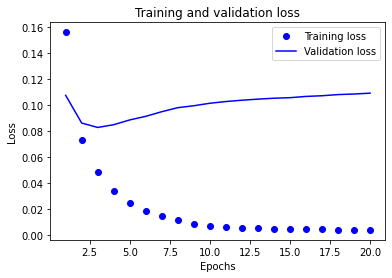

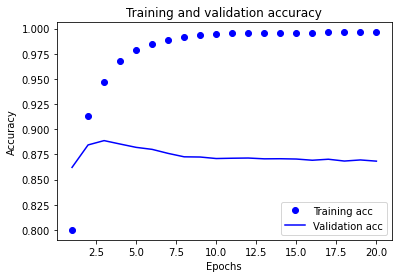

In [ ]:
historyp4 = history4.history
loss_values = historyp4["loss"]
val_loss_values = historyp4["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


plt.clf()
acc = historyp4["accuracy"]
val_acc = historyp4["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

Use any technique we studied in class, and these include regularization, dropout, etc., to get your model to perform better on validation.

In [ ]:
modelx5 = keras.Sequential([
    layers.Dense(20, activation="relu"),
    layers.Dropout(0.2),
    layers.Dense(15, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

In [ ]:
modelx5.compile(optimizer="adam",
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [ ]:
historyx5 = modelx5.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 3s 66ms/step - loss: 0.5618 - accuracy: 0.7393 - val_loss: 0.3875 - val_accuracy: 0.8632
Epoch 2/20
30/30 [==============================] - 1s 43ms/step - loss: 0.3189 - accuracy: 0.8850 - val_loss: 0.2905 - val_accuracy: 0.8874
Epoch 3/20
30/30 [==============================] - 1s 42ms/step - loss: 0.2226 - accuracy: 0.9237 - val_loss: 0.2738 - val_accuracy: 0.8903
Epoch 4/20
30/30 [==============================] - 1s 44ms/step - loss: 0.1679 - accuracy: 0.9451 - val_loss: 0.2832 - val_accuracy: 0.8868
Epoch 5/20
30/30 [==============================] - 1s 42ms/step - loss: 0.1301 - accuracy: 0.9581 - val_loss: 0.2918 - val_accuracy: 0.8847
Epoch 6/20
30/30 [==============================] - 1s 43ms/step - loss: 0.1012 - accuracy: 0.9713 - val_loss: 0.3128 - val_accuracy: 0.8822
Epoch 7/20
30/30 [==============================] - 1s 43ms/step - loss: 0.0768 - accuracy: 0.9795 - val_loss: 0.3356 - val_accuracy: 0.8831
Epoch 8/20
30

Ploting

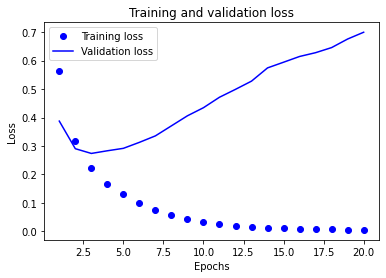

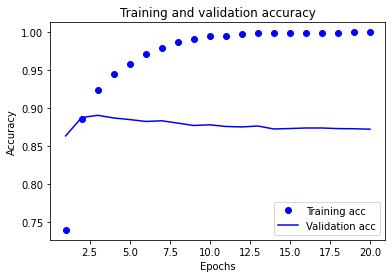

In [ ]:
historyp5 = historyx5.history
loss_values = historyp5["loss"]
val_loss_values = historyp5["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


plt.clf()
acc = historyp5["accuracy"]
val_acc = historyp5["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()